In [61]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
import warnings

In [59]:
warnings.filterwarnings('ignore')

# df = pd.read_csv(os.getcwd()+"/data/final.csv")
df['start_date'] = pd.to_datetime(df.start_date)

df.end_date[df.end_date== "12/31/9999"] = "11/04/2261"
df['end_date'] = pd.to_datetime(df.end_date)

df['latest_transaction_date'] = pd.to_datetime(df.latest_transaction_date)
df.head()

,id,first_name,last_name,email_id,birthdate,street_address,zipcode,city,state,phone_number,...,streaming_music,streaming_movies,contract,start_date,end_date,monthly_charges,tenure,total_charges,latest_transaction_date,segment
0,1,Eustace,McCoid,emccoid0@parallels.com,5/18/1959,0308 Bunker Hill Parkway,92844,Garden Grove,California,310-554-8521,...,No,No,Annual,2017-10-30,2018-10-30,40,12,480,2018-09-30,Almost Lost
1,2,Isador,Maestro,imaestro1@naver.com,5/26/2006,41 Kings Alley,28272,Charlotte,North Carolina,704-996-0008,...,No internet service,No internet service,Monthly,2017-05-23,2261-11-04,40,26,1040,2019-05-23,Average Customers
2,3,Irv,Gaskins,igaskins2@gnu.org,1/23/1987,6220 Vermont Lane,24020,Roanoke,Virginia,540-804-0338,...,No,Yes,Monthly,2016-10-27,2261-11-04,55,33,2970,2019-07-27,Best Customer
3,4,Bengt,Serot,bserot3@squarespace.com,4/23/1969,67293 Rockefeller Road,70894,Baton Rouge,Louisiana,225-969-8568,...,No internet service,No internet service,Annual,2017-07-12,2261-11-04,40,24,960,2019-07-12,Average Customers
4,5,Darrel,Brennon,dbrennon4@ifeng.com,5/1/1993,168 Sage Plaza,29579,Myrtle Beach,South Carolina,843-474-0154,...,No internet service,No internet service,Annual,2017-01-08,2018-01-08,40,12,480,2017-12-08,Lost Cheap Customers


In [23]:
df.describe()

,id,zipcode,age,average_call_length,monthly_charges,tenure,total_charges
count,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,53110.404900,39.38590,31.288606,47.859300,19.387600,926.279300
std,2886.89568,28925.508964,15.41368,17.272236,17.162708,10.355583,627.372082
min,1.00000,214.000000,13.00000,1.000000,32.000000,5.000000,160.000000
25%,2500.75000,29206.750000,26.00000,16.380000,40.000000,12.000000,480.000000
50%,5000.50000,48915.500000,40.00000,31.540000,40.000000,14.000000,720.000000
75%,7500.25000,79182.000000,53.00000,46.360000,46.000000,28.000000,1218.250000
max,10000.00000,99790.000000,66.00000,61.000000,95.000000,42.000000,3990.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
id                         10000 non-null int64
first_name                 10000 non-null object
last_name                  10000 non-null object
email_id                   10000 non-null object
birthdate                  10000 non-null object
street_address             10000 non-null object
zipcode                    10000 non-null int64
city                       10000 non-null object
state                      10000 non-null object
phone_number               10000 non-null object
active                     10000 non-null bool
region                     10000 non-null object
gender                     10000 non-null object
age                        10000 non-null int64
connection_type            10000 non-null object
average_call_length        10000 non-null float64
phone_service              10000 non-null object
multiplie_lines            10000 non-null object
paperless_bill

# Label Encoding categorical variables 

In [25]:
#getting a copy
df_encoded = pd.DataFrame()
#Encoding
le = LabelEncoder()

#****************************Labeling personas**************
active = df['active'].values
le.fit(active)
active = le.transform(active)
df['active'] = active

#****************************Labeling region**************
region = df['region'].values

#Encoding
le = LabelEncoder()
le.fit(region)
region = le.transform(region)
df['region'] = region

#****************************Labeling gender**************
gender = df['gender'].values
le.fit(gender)
gender = le.transform(gender)
df['gender'] = gender

#****************************Labeling connection_type**************
connection_type = df['connection_type'].values
le.fit(connection_type)
connection_type = le.transform(connection_type)
df['connection_type'] = connection_type

#****************************Labeling phone_service**************
phone_service = df['phone_service'].values
le.fit(phone_service)
phone_service = le.transform(phone_service)
df['phone_service'] = phone_service

#****************************Labeling multiplie_lines**************
multiplie_lines = df['multiplie_lines'].values
le.fit(multiplie_lines)
multiplie_lines = le.transform(multiplie_lines)
df['multiplie_lines'] = multiplie_lines

#****************************Labeling paperless_billing**************
paperless_billing = df['paperless_billing'].values
le.fit(paperless_billing)
paperless_billing = le.transform(paperless_billing)
df['paperless_billing'] = paperless_billing

#****************************Labeling paperless_billing**************
payment_method = df['payment_method'].values
le.fit(payment_method)
payment_method = le.transform(payment_method)
df['payment_method'] = payment_method

#****************************Labeling internet_service**************
internet_service = df['internet_service'].values
le.fit(internet_service)
internet_service = le.transform(internet_service)
df['internet_service'] = internet_service

#****************************Labeling online_security**************
online_security = df['online_security'].values
le.fit(online_security)
online_security = le.transform(online_security)
df['online_security'] = online_security

#****************************Labeling online_backup**************
online_backup = df['online_backup'].values
le.fit(online_backup)
online_backup = le.transform(online_backup)
df['online_backup'] = online_backup

#****************************Labeling tech_support**************
tech_support = df['tech_support'].values
le.fit(tech_support)
tech_support = le.transform(tech_support)
df['tech_support'] = tech_support

#****************************Labeling device_protection**************
device_protection = df['device_protection'].values
le.fit(device_protection)
device_protection = le.transform(device_protection)
df['device_protection'] = device_protection

#****************************Labeling streaming_music**************
streaming_music = df['streaming_music'].values
le.fit(streaming_music)
streaming_music = le.transform(streaming_music)
df['streaming_music'] = streaming_music

#****************************Labeling streaming_movies**************
streaming_movies = df['streaming_movies'].values
le.fit(streaming_movies)
streaming_movies = le.transform(streaming_movies)
df['streaming_movies'] = streaming_movies

#****************************Labeling contract**************
contract = df['contract'].values
le.fit(contract)
contract = le.transform(contract)
df['contract'] = contract

#****************************Labeling segment**************
segment = df['segment'].values
le.fit(segment)
segment = le.transform(segment)
df['segment'] = segment

#****************************Encoding start_dt**************
df['start_date'] = df.start_date.dt.dayofyear

#****************************Encoding start_dt**************
df['end_date'] = df.end_date.dt.dayofyear

#****************************Encoding start_dt**************
df['latest_transaction_date'] = df.latest_transaction_date.dt.dayofyear

# Feature Scaling and identifying correlation

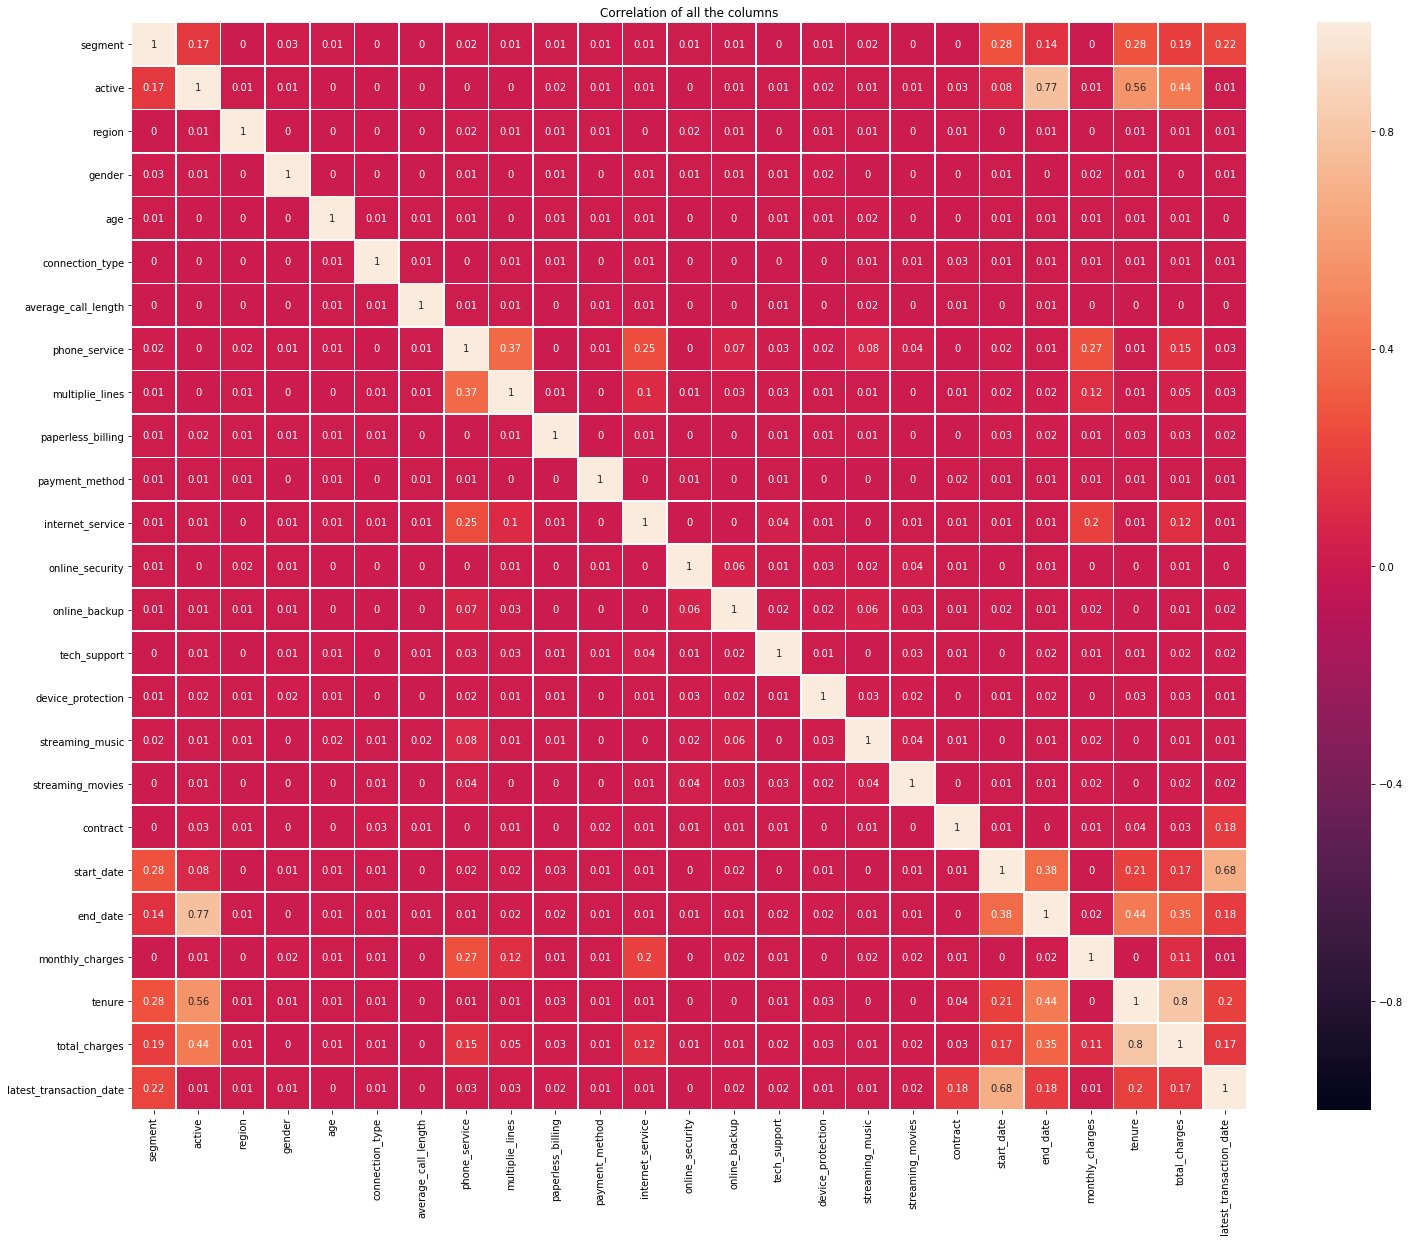

In [26]:
df_cor = df[['segment','active','region','gender','age','connection_type','average_call_length','phone_service',
            'multiplie_lines','paperless_billing','payment_method','internet_service','online_security',
            'online_backup','tech_support','device_protection','streaming_music','streaming_movies','contract','start_date',
            'end_date','monthly_charges','tenure','total_charges','latest_transaction_date']]


# Initialise the Scaler 
scaler = StandardScaler() 

# To scale data 
x = scaler.fit_transform(df_cor)

scaled_df = pd.DataFrame(x)

scaled_df.columns = ['segment','active','region','gender','age','connection_type','average_call_length','phone_service',
            'multiplie_lines','paperless_billing','payment_method','internet_service','online_security',
            'online_backup','tech_support','device_protection','streaming_music','streaming_movies','contract','start_date',
            'end_date','monthly_charges','tenure','total_charges','latest_transaction_date']

correlation = abs(scaled_df.corr()) #taking only the absolute values

plt.figure(figsize = (25,20))

plt.title('Correlation of all the columns')

sb.heatmap(round(correlation,2), linewidths=.7, annot=True,vmin=-1, vmax=1) #cmap="YlGnBu"

### Scaled data

In [27]:
scaled_df['id']= df['id']

scaled_df['segment']= df['segment']

scaled_df.set_index('id')

scaled_df.head()

,segment,active,region,gender,age,connection_type,average_call_length,phone_service,multiplie_lines,paperless_billing,...,streaming_music,streaming_movies,contract,start_date,end_date,monthly_charges,tenure,total_charges,latest_transaction_date,id
0,0,-1.34528,-0.208797,1.020817,1.337457,-0.996207,1.702898,-1.679199,-0.614029,0.994217,...,-1.104069,-1.137996,-1.010253,1.131829,0.519185,-0.457952,-0.713429,-0.711383,1.072108,1
1,1,0.74334,0.763935,1.020817,-1.711935,1.003807,-1.118533,0.595522,-0.614029,-1.005817,...,0.035439,0.000797,0.989851,-0.386922,0.572228,-0.457952,0.638567,0.181274,-0.260958,2
2,2,0.74334,0.763935,1.020817,-0.414322,-0.996207,-1.113901,0.595522,-0.614029,-1.005817,...,-1.104069,1.139590,0.989851,1.112845,0.572228,0.416080,1.314564,3.257752,0.405575,3
3,1,0.74334,0.763935,1.020817,0.688650,-0.996207,0.051032,0.595522,1.628589,-1.005817,...,0.035439,0.000797,-1.010253,0.087688,0.572228,-0.457952,0.445425,0.053752,0.251760,4
4,4,-1.34528,0.763935,1.020817,-0.868486,1.003807,-1.169485,0.595522,-0.614029,-1.005817,...,0.035439,0.000797,-1.010253,-1.668368,-2.610370,-0.457952,-0.713429,-0.711383,1.779659,5


In [28]:
df_final = scaled_df[['id','active','start_date','end_date','tenure','total_charges','latest_transaction_date','segment']]

df_final.head()

,id,active,start_date,end_date,tenure,total_charges,latest_transaction_date,segment
0,1,-1.34528,1.131829,0.519185,-0.713429,-0.711383,1.072108,0
1,2,0.74334,-0.386922,0.572228,0.638567,0.181274,-0.260958,1
2,3,0.74334,1.112845,0.572228,1.314564,3.257752,0.405575,2
3,4,0.74334,0.087688,0.572228,0.445425,0.053752,0.251760,1
4,5,-1.34528,-1.668368,-2.610370,-0.713429,-0.711383,1.779659,4


In [29]:
#independent variables
X= df_final[['active','start_date','end_date','tenure','total_charges','latest_transaction_date']]

#target variable
y = df_final['segment']

#split the data in 70-30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [30]:
def modelEvaluation(y_true,y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision_recall_f1 = metrics.precision_recall_fscore_support(y_true, y_pred,average="weighted")
    return accuracy,precision_recall_f1

## KNN Classifier

In [33]:
model1 = KNeighborsClassifier()

knn = model1.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# # accuracy on X_test 
# accuracy = knn.score(X_test, y_test) 
# print("Accuracy:",accuracy)

#Model Evaluation
accuracy,precision_recall = modelEvaluation(y_test,knn_pred)

print("Accuracy(%):",accuracy*100)
print("F1 Score:",precision_recall[2])
print("Precision:",precision_recall[0])
print("Recall:",precision_recall[1])

#Take the two values for comparison as actual and predicted
pred_df_knn = pd.DataFrame({'Actual': y_test, 'Predicted': knn_pred})
pred_df_knn['id'] = df['id']
pred_df_knn.set_index('id')

pred_df_knn.head(10)

Accuracy(%): 88.0
F1 Score: 0.8803623132588484
Precision: 0.8831135847135959
Recall: 0.88


,Actual,Predicted,id
6286,0,0,6287
571,0,0,572
1188,1,1,1189
2236,0,0,2237
1661,6,6,1662
5184,5,1,5185
6453,6,6,6454
2866,0,4,2867
4252,0,0,4253
5821,1,4,5822


### Hyperparameter Tuning

In [34]:
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10], #number of neighbors to be used 
          'leaf_size':[1,2,3,5], #passed to BallTree and KDTree affects the speed of the construction and query
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

#Making models with hyper parameters sets
modelhp = GridSearchCV(model1, param_grid=params, cv=5,n_jobs=1)

#Learning
modelhp.fit(X_train, y_train)

#The best hyper parameters set 
print("Best Hyper Parameters:\n",modelhp.best_params_)

print(" ")

#Prediction
prediction=modelhp.predict(X_test)

#Model Evaluation
accuracy,precision_recall = modelEvaluation(y_test,prediction)

print("Accuracy after hyperparameter tuning(%):",accuracy*100)
print("F1 Score after hyperparameter tuning:",precision_recall[2])
print("Precision after hyperparameter tuning:",precision_recall[0])
print("Recall after hyperparameter tuning:",precision_recall[1])

#Take the two values for comparison as actual and predicted
pred_df_knn_hp = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
pred_df_knn_hp['id'] = df['id']
pred_df_knn_hp.set_index('id')

pred_df_knn_hp.head(10)

Best Hyper Parameters:
 {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}
 
Accuracy after hyperparameter tuning(%): 89.60000000000001
F1 Score after hyperparameter tuning: 0.8957795409783125
Precision after hyperparameter tuning: 0.896608721020631
Recall after hyperparameter tuning: 0.896


,Actual,Predicted,id
6286,0,0,6287
571,0,0,572
1188,1,1,1189
2236,0,0,2237
1661,6,6,1662
5184,5,5,5185
6453,6,6,6454
2866,0,4,2867
4252,0,0,4253
5821,1,4,5822


# Logistic Regression

In [35]:
model2 = LogisticRegression()

lr = model2.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

#Model Evaluation
accuracy,precision_recall = modelEvaluation(y_test,lr_pred)

print("Accuracy(%):",accuracy*100)
print("F1 Score:",precision_recall[2])
print("Precision:",precision_recall[0])
print("Recall:",precision_recall[1])

#Take the two values for comparison as actual and predicted
pred_df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred})
pred_df_lr['id'] = df['id']
pred_df_lr.set_index('id')

pred_df_lr.head(10)

Accuracy(%): 66.5
F1 Score: 0.6348335428837246
Precision: 0.6865578329724134
Recall: 0.665


,Actual,Predicted,id
6286,0,0,6287
571,0,0,572
1188,1,1,1189
2236,0,6,2237
1661,6,1,1662
5184,5,4,5185
6453,6,6,6454
2866,0,4,2867
4252,0,0,4253
5821,1,4,5822


### Hyperparameter tuning

In [36]:
params = {'penalty': ['l2'],  #penalty parameter of the error term
          'C': [5.0,6.0,7.0,8.0],
         'multi_class':['auto'],
         'solver':["lbfgs"],
          'max_iter':[2500]
         }  #Multiclass classification

#Making models with hyper parameters sets
modelhp = GridSearchCV(model2, param_grid=params, cv=5, n_jobs=-1)

#Learning
modelhp.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",modelhp.best_params_)
print(" ")

#Prediction
prediction=modelhp.predict(X_test)

#Model Evaluation
accuracy,precision_recall = modelEvaluation(y_test,prediction)

print("Accuracy after hyperparameter tuning(%):",accuracy*100)
print("F1 Score after hyperparameter tuning:",precision_recall[2])
print("Precision after hyperparameter tuning:",precision_recall[0])
print("Recall after hyperparameter tuning:",precision_recall[1])

#Take the two values for comparison as actual and predicted
pred_df_lr_hp = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
pred_df_lr_hp['id'] = df['id']
pred_df_lr_hp.set_index('id')

pred_df_lr_hp.head(10)

Best Hyper Parameters:
 {'C': 6.0, 'max_iter': 2500, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
 
Accuracy after hyperparameter tuning(%): 67.73333333333333
F1 Score after hyperparameter tuning: 0.652603383380748
Precision after hyperparameter tuning: 0.6972881855594213
Recall after hyperparameter tuning: 0.6773333333333333


,Actual,Predicted,id
6286,0,0,6287
571,0,0,572
1188,1,1,1189
2236,0,6,2237
1661,6,1,1662
5184,5,4,5185
6453,6,6,6454
2866,0,4,2867
4252,0,0,4253
5821,1,4,5822


# RandomForest Classifier

In [37]:
model3 = RandomForestClassifier()

rcf = model3.fit(X_train, y_train)
rcf_pred = rcf.predict(X_test)

#Model Evaluation
accuracy,precision_recall = modelEvaluation(y_test,rcf_pred)

print("Accuracy(%):",accuracy*100)
print("F1 Score:",precision_recall[2])
print("Precision:",precision_recall[0])
print("Recall:",precision_recall[1])

#Take the two values for comparison as actual and predicted
pred_df_rcf = pd.DataFrame({'Actual': y_test, 'Predicted': rcf_pred})
pred_df_rcf['id'] = df['id']
pred_df_rcf.set_index('id')

pred_df_rcf.head(10)

Accuracy(%): 90.46666666666667
F1 Score: 0.9044831673862033
Precision: 0.9050686730473464
Recall: 0.9046666666666666


,Actual,Predicted,id
6286,0,0,6287
571,0,0,572
1188,1,1,1189
2236,0,0,2237
1661,6,6,1662
5184,5,5,5185
6453,6,6,6454
2866,0,4,2867
4252,0,0,4253
5821,1,4,5822


In [38]:
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

#Making models with hyper parameters sets
modelhp = GridSearchCV(model3, param_grid=params, n_jobs=-1)

#learning
modelhp.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n",modelhp.best_params_)
print(" ")

#Prediction
prediction=modelhp.predict(X_test)

#Model Evaluation
accuracy,precision_recall = modelEvaluation(y_test,prediction)

print("Accuracy after hyperparameter tuning(%):",accuracy*100)
print("F1 Score after hyperparameter tuning:",precision_recall[2])
print("Precision after hyperparameter tuning:",precision_recall[0])
print("Recall after hyperparameter tuning:",precision_recall[1])

#Take the two values for comparison as actual and predicted
pred_df_rcf_hp = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
pred_df_rcf_hp['id'] = df['id']
pred_df_rcf_hp.set_index('id')

pred_df_rcf_hp.head(10)

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 123}
 
Accuracy after hyperparameter tuning(%): 90.60000000000001
F1 Score after hyperparameter tuning: 0.9060797685133669
Precision after hyperparameter tuning: 0.9064812610347729
Recall after hyperparameter tuning: 0.906


,Actual,Predicted,id
6286,0,0,6287
571,0,0,572
1188,1,1,1189
2236,0,0,2237
1661,6,6,1662
5184,5,5,5185
6453,6,6,6454
2866,0,4,2867
4252,0,0,4253
5821,1,4,5822


# Support Vector Machine

In [39]:
model4 = svm.SVC(gamma='scale')

sv = model4.fit(X_train, y_train)
sv_pred = sv.predict(X_test)

#Model Evaluation
accuracy,precision_recall = modelEvaluation(y_test,sv_pred)

print("Accuracy(%):",accuracy)
print("F1 Score:",precision_recall[2])
print("Precision:",precision_recall[0])
print("Recall:",precision_recall[1])

#Take the two values for comparison as actual and predicted
pred_df_sv = pd.DataFrame({'Actual': y_test, 'Predicted': sv_pred})
pred_df_sv['id'] = df['id']
pred_df_sv.set_index('id')

pred_df_sv.head(10)

Accuracy(%): 0.8296666666666667
F1 Score: 0.813698830766727
Precision: 0.8524363843418512
Recall: 0.8296666666666667


,Actual,Predicted,id
6286,0,0,6287
571,0,0,572
1188,1,1,1189
2236,0,0,2237
1661,6,6,1662
5184,5,4,5185
6453,6,6,6454
2866,0,4,2867
4252,0,0,4253
5821,1,4,5822


### Hyperparameter Tuning

In [40]:
params = {'C': [5.0,6.0,7.0,8.0,9.0,10.0],  #penalty parameter of the error term
          'kernel': ['linear','rbf']}  #specifies the kernel type 

#Making models with hyper parameters sets
modelhp = GridSearchCV(model4, param_grid=params, cv=5, n_jobs=-1)

#Learning
modelhp.fit(X_train,y_train)

#The best hyper parameters se t
print("Best Hyper Parameters:\n",modelhp.best_params_)
print(" ")

#Prediction
prediction=modelhp.predict(X_test)

#Model Evaluation
accuracy,precision_recall = modelEvaluation(y_test,prediction)

print("Accuracy after hyperparameter tuning(%):",accuracy)
print("F1 Score after hyperparameter tuning:",precision_recall[2])
print("Precision after hyperparameter tuning:",precision_recall[0])
print("Recall after hyperparameter tuning:",precision_recall[1])

#Take the two values for comparison as actual and predicted
pred_df_sv_hp = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
pred_df_sv_hp['id'] = df['id']
pred_df_sv_hp.set_index('id')

pred_df_sv_hp.head(10)

Best Hyper Parameters:
 {'C': 10.0, 'kernel': 'rbf'}
 
Accuracy after hyperparameter tuning(%): 0.8673333333333333
F1 Score after hyperparameter tuning: 0.861747145447931
Precision after hyperparameter tuning: 0.8790104472041355
Recall after hyperparameter tuning: 0.8673333333333333


,Actual,Predicted,id
6286,0,0,6287
571,0,0,572
1188,1,1,1189
2236,0,0,2237
1661,6,6,1662
5184,5,4,5185
6453,6,6,6454
2866,0,4,2867
4252,0,0,4253
5821,1,4,5822


# Ensemble Modeling

In [62]:
kf = KFold(n_splits = 5)

for trn_indx, tst_indx in kf.split(X):
    kf_X_train, kf_X_test = X.iloc[trn_indx], X.iloc[tst_indx]

for trn_index,tst_index in kf.split(y):
    kf_y_train,kf_y_test = y.iloc[trn_index], y.iloc[tst_indx]

estimators = []

estimators.append(('knn', model1))

estimators.append(('logistic', model2))

estimators.append(('randomforest', model3))

estimators.append(('svc', model4))


# create the ensemble model
ensemble = VotingClassifier(estimators)

ensemble.fit(kf_X_train,kf_y_train)

prediction = ensemble.predict(kf_X_test)


#Model Evaluation
accuracy,precision_recall = modelEvaluation(kf_y_test,prediction)

print("Accuracy(%):",accuracy*100)
print("F1 Score:",precision_recall[2])
print("Precision:",precision_recall[0])
print("Recall:",precision_recall[1])

#Take the two values for comparison as actual and predicted
pred_df_ensmb = pd.DataFrame({'Actual': kf_y_test, 'Predicted': prediction})
pred_df_ensmb['id'] = df['id']
pred_df_ensmb.set_index('id')

pred_df_ensmb.head(10)

Accuracy(%): 87.35000000000001
F1 Score: 0.8663385587092329
Precision: 0.8780953283727595
Recall: 0.8735


,Actual,Predicted,id
8000,4,4,8001
8001,4,0,8002
8002,2,2,8003
8003,6,6,8004
8004,1,1,8005
8005,1,1,8006
8006,0,0,8007
8007,0,0,8008
8008,1,1,8009
8009,4,4,8010
